In [1]:
%matplotlib inline
import gwpy

In [13]:
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries

gps = event_gps('GW170817')
print("GW170817 GPS:", gps)

hdata = TimeSeries.fetch_open_data('H1', int(gps)-512, int(gps)+512, cache=True)
print("GW170817 data")
print(hdata)

GW170817 GPS: 1187008882.4
GW170817 data
TimeSeries([5.73571971e-19, 5.79616885e-19, 5.76818759e-19, ...,
            4.70957633e-19, 4.58255672e-19, 4.61226401e-19]
           unit: dimensionless,
           t0: 1187008370.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


### This is a 17 minute long observation.

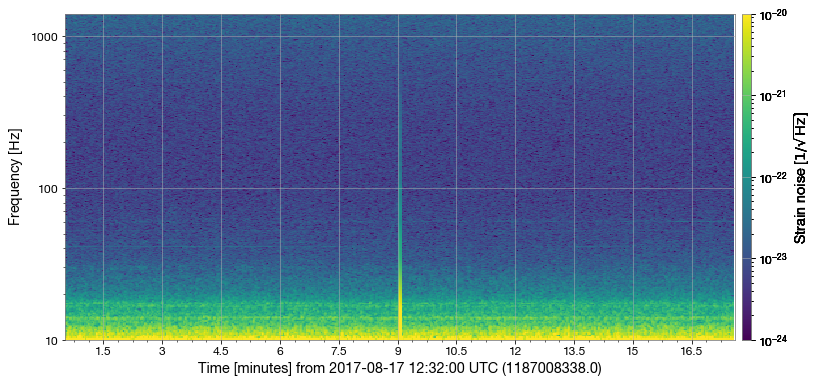

In [14]:
ax = plot.gca()
ax.set_yscale('log')
ax.set_ylim(10, 1400)
ax.colorbar(
    clim=(1e-24, 1e-20),
    norm="log",
    label=r"Strain noise [$1/\sqrt{\mathrm{Hz}}$]",
)
plot

Q-transforms in GWpy
The spectrogram above is a useful way to show the variation of a power spectral density (PSD) estimate over time. It's best used to see general trends in how the sensitivity of the GW detectors is changing over longish periods (minutes or hours).

In this section, we will see how we can use a special filter called a Q-transform to create a time-frequency representation of our data that allows use to pick out features at different frequencies, and how they evolve over very short times, without much prior knowledge of the signal morphology.

See this article for more details on the Q-transform and its application to gravitational-wave data

In [16]:
segment = (int(gps) - 30, int(gps) + 2)
hdata = TimeSeries.fetch_open_data('H1', *segment, verbose=True)

Fetched 1 URLs from www.gw-openscience.org for [1187008852 .. 1187008884))
Reading data... [Done]


We can now use the q_transform() method of the hdata TimeSeries to create our time-frequency representation (as a spectrogram).

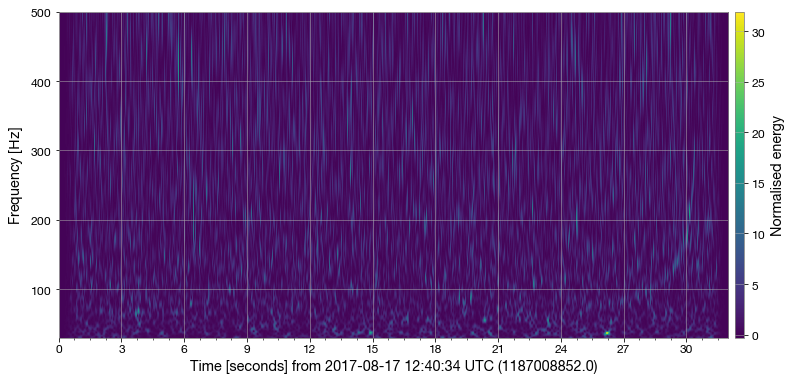

In [17]:
hq = hdata.q_transform(frange=(30, 500))
plot = hq.plot()
plot.colorbar(label="Normalised energy")
# CQT transforms a data series to the frequency domain

From this we can see a different representation of the data. Because the Q-transform returns (by default) normalised energy, the low-frequency rumbling is now much less obvious, and we can see better some noises at higher frequencies.

But, we can clean up the display to better visualise the data:

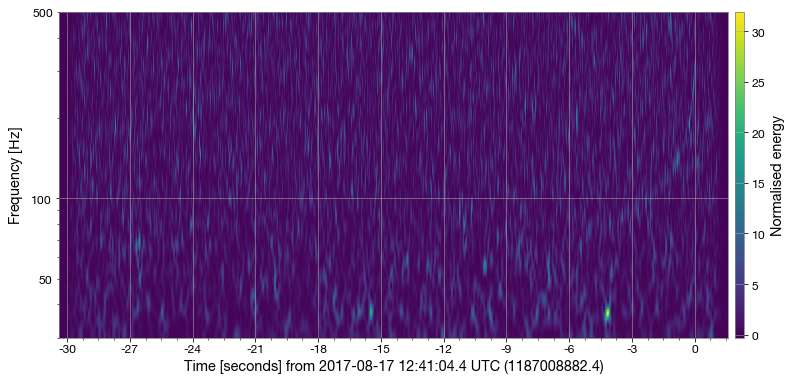

In [18]:
ax = plot.gca()
ax.set_epoch(gps)
ax.set_ylim(30, 500)
ax.set_yscale("log")
plot 

Now we can see a more prominent feature starting at ~-6 seconds that looks a little familiar. Here we can use our knowledge of the Q-transform, and our hunch about the origin of the 'feature' to choose a more specific range of 'Q' for the Q-transform, so as to better resolve the feature:

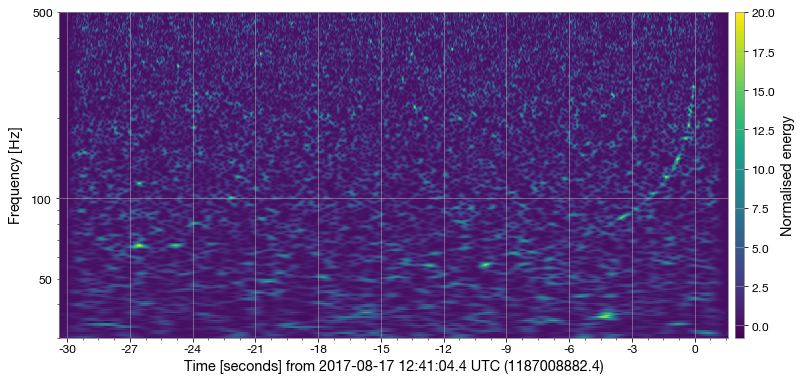

In [25]:
hq = hdata.q_transform(frange=(30, 500), qrange=(100, 130))
plot = hq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

Now we see the beautiful, clear track of a BNS merger, visible from about -4 seconds (maye -10 if you squint), all the way through to the merger at T=0.

HINT: We can also use the outseg option to zoom in around the merger:

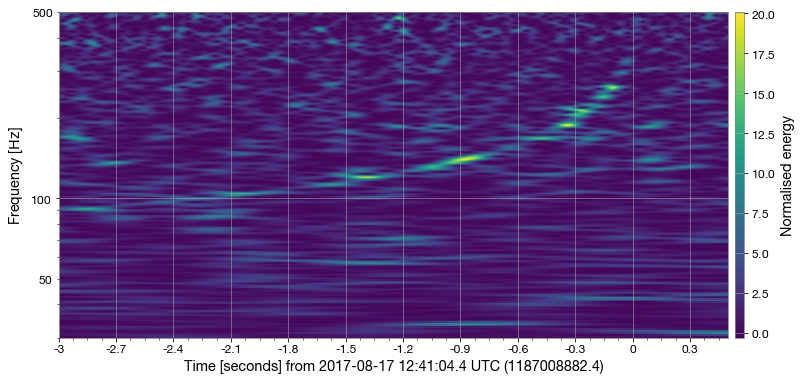

In [29]:
#-- Use OUTSEG for small time range Zoomed image
hq2 = hdata.q_transform(frange=(30, 500), qrange=(80, 110), outseg=(gps-3,gps+0.5)) 
plot = hq2.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

We can repeat the exercise using LIGO-Livingston data to see something even more remarkable. First we download and filter the Livingston data:

In [38]:
gps = event_gps('GW170817')
print("GW170817 GPS:", gps)

ldata = TimeSeries.fetch_open_data('L1', int(gps)-512, int(gps)+512, cache=True)
print("GW170817 data")
print(ldata)

GW170817 GPS: 1187008882.4
GW170817 data
TimeSeries([2.06056010e-20, 1.59181918e-20, 2.18438811e-20, ...,
            1.25504332e-19, 1.23976846e-19, 1.22231459e-19]
           unit: dimensionless,
           t0: 1187008370.0 s,
           dt: 0.000244140625 s,
           name: Strain,
           channel: None)


In [39]:
ldata = TimeSeries.fetch_open_data('L1', *segment, verbose=True)

Fetched 1 URLs from www.gw-openscience.org for [1187008852 .. 1187008884))
Reading data... [Done]


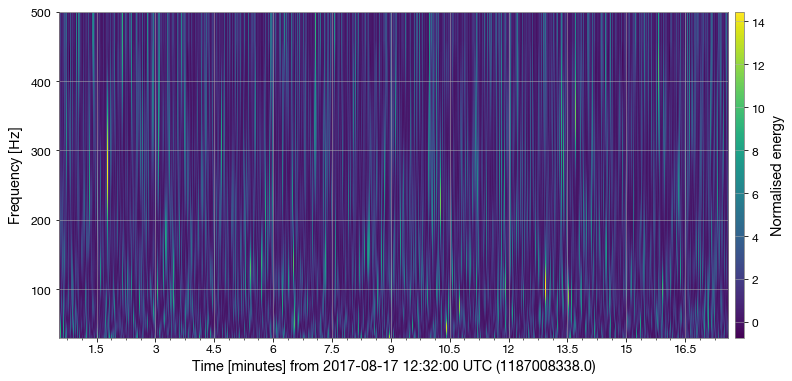

In [40]:
lq = hdata.q_transform(frange=(30, 500))
plot = lq.plot()
plot.colorbar(label="Normalised energy")
# CQT transforms a data series to the frequency domain

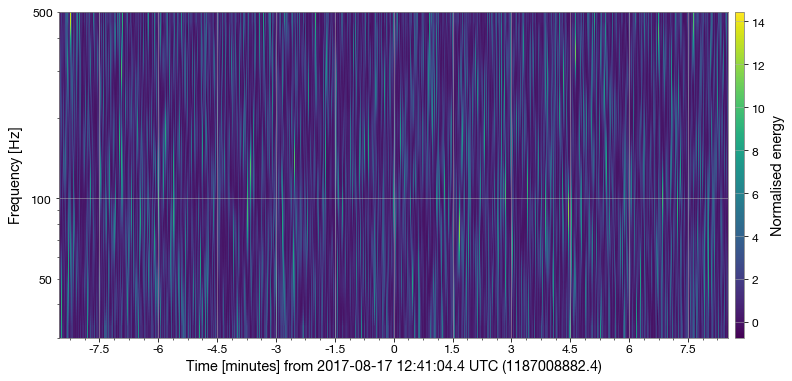

In [41]:
al = plot.gca()
al.set_epoch(gps)
al.set_ylim(30, 500)
al.set_yscale("log")
plot 

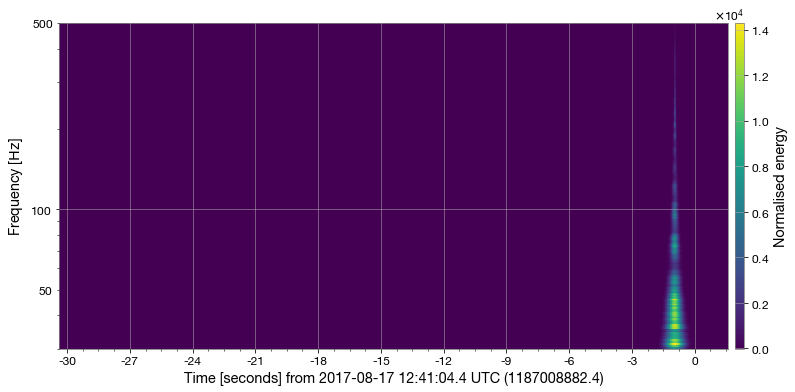

In [42]:
lq = ldata.q_transform(frange=(30, 500), qrange=(100, 110))
plot = lq.plot()
ax = plot.gca()
ax.set_epoch(gps)
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

Now we can see a large blob of energy that is 1000 times louder than what we see in the LIGO-Hanford data. As luck would have it, an instrumental glitch almost exactly overlaps the BNS signal in LIGO-Livingston. But, we can rescale things to see the astrophyscal signal better:

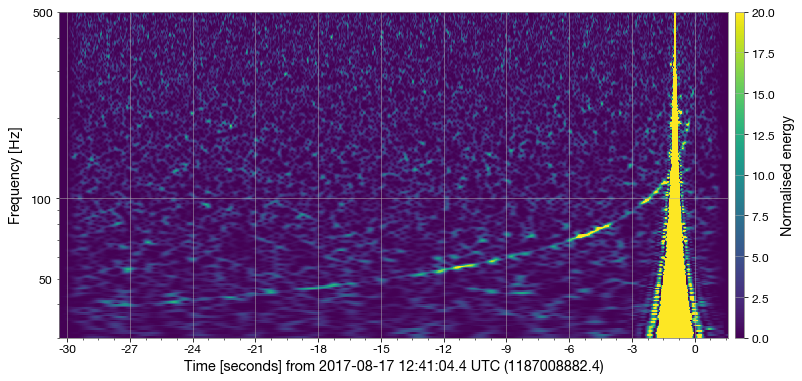

In [43]:
plot.colorbars[0].mappable.set_clim(0,20)
plot.refresh()
plot

Now we can see the BNS signal track all the way back to T=-28 seconds in LIGO-Livingston data!

This is basically the same procedure (and the same code) that was used to produce Figures 1 and 2 of the BNS discovery article 'Observation of Gravitational Waves from a Binary Neutron Star Inspiral' 